# Coursework Assignment
## Module Code: CC5067NT
## Module Title: Smart Data Discovery
## Module Leader: Mr. Zishan Siddique 
#### ---------------------------------------------
## Name: Abhishek Sharma


## Import libraries

In [1]:
# import matplotlib
# import seaborn
# import scipy
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

## Import the dataset using pandas library

In [3]:
# loading the CSV file
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory = False)

#display basic info
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (300698, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# Data Understanding/Describe the dataset
### Basic Exploration of data

In [4]:
# Check data types and missing values
print("\nData Types and Missing Values:")
display(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe(include='all'))

# Check missing values
print("\nMissing Values per Column:")
display(df.isnull().sum().sort_values(ascending=False))


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-nul

None


Summary Statistics:


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,3.006980e+05,300698,298534,300698,300698,300698,294784,300567,298083.000000,256288,...,243,243,213,213,0.0,1,2,297158.000000,297158.000000,297158
unique,NaN,259493,237165,1,3,24,45,18,NaN,107652,...,29,34,2,160,NaN,1,2,NaN,NaN,126048
top,NaN,07-11-15 23:04,11-08-15 7:34,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,NaN,1207 BEACH AVENUE,...,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),NaN,Manhattan Bound,St. George Terminal (Staten Island),NaN,NaN,"(40.83036235589997, -73.86602154214397)"
freq,NaN,9,24,300698,300690,77044,61430,249299,NaN,904,...,33,21,162,6,NaN,1,1,NaN,NaN,902
mean,3.130054e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10848.888645,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,NaN
std,5.738547e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.182081,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,NaN
min,3.027948e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,NaN
25%,3.080118e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10310.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,NaN
50%,3.130436e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11208.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,NaN
75%,3.178446e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11238.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,NaN



Missing Values per Column:


School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Location             300698
Garage Lot Name                   300698
Ferry Direction                   300697
Ferry Terminal Name               300696
Road Ramp                         300485
Bridge Highway Segment            300485
Bridge Highway Name               300455
Bridge Highway Direction          300455
Landmark                          300349
Intersection Street 2             257336
Intersection Street 1             256840
Cross Street 2                     49779
Cross Street 1                     49279
Street Name                        44410
Incident Address                   44410
Descriptor                          5914
X Coordinate (State Plane)          3540
Latitude                            3540
Longitude                           3540
Y Coordinate (State Plane)          3540
Location                            3540
Address Type    

# Data Preparation
### Convert the Columns "Created Date" and "Closed Date" to Datetime Datatype and Create a New Column "Request_Closing_Time"

In [6]:
from datetime import datetime

# Convert to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Calculate time difference in hours
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

# Drop rows where closing time is negative (invalid data)
df = df[df['Request_Closing_Time'] >= 0]

# Display a sample to verify
print(df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head())

         Created Date         Closed Date  Request_Closing_Time
0 2015-12-31 23:59:45 2016-01-01 00:55:00              0.920833
1 2015-12-31 23:59:44 2016-01-01 01:26:00              1.437778
2 2015-12-31 23:59:29 2016-01-01 04:51:00              4.858611
3 2015-12-31 23:57:46 2016-01-01 07:43:00              7.753889
4 2015-12-31 23:56:58 2016-01-01 03:24:00              3.450556


### Drop Irrelevant Columns

In [9]:
# List of columns to drop
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name',
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code',
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip',
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name',
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date',
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

# Drop columns
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Display the updated dataframe columns
print(df_clean.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')


### Remove NaN Missing Values from Updated Dataframe/Handle Missing Values

In [10]:
# Drop rows with NaN values in critical columns (e.g., 'Borough', 'Complaint Type')
df_clean = df_clean.dropna(subset=['Borough', 'Complaint Type', 'Request_Closing_Time'])

# Display the shape of the updated dataframe
print("Updated dataframe shape:", df_clean.shape)

Updated dataframe shape: (298534, 15)


### Check the Unique Values from All Columns in the Dataframe

In [11]:
# Display unique values for each column
for col in df_clean.columns:
    print(f"Column: {col}")
    print("Unique Values:", df_clean[col].unique()[:5], "...\n")

Column: Unique Key
Unique Values: [32310363 32309934 32309159 32305098 32306529] ...

Column: Created Date
Unique Values: <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58']
Length: 5, dtype: datetime64[ns] ...

Column: Closed Date
Unique Values: <DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00']
Length: 5, dtype: datetime64[ns] ...

Column: Agency
Unique Values: ['NYPD'] ...

Column: Complaint Type
Unique Values: ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial'] ...

Column: Descriptor
Unique Values: ['Loud Music/Party' 'No Access' 'Commercial Overnight Parking'
 'Blocked Sidewalk' 'Posted Parking Sign Violation'] ...

Column: Location Type
Unique Values: ['Street/Sidewalk' 'Club/Bar/Restaurant' 'Store/Commercial'
 'House of Worship' 'Residential Building/House'] ...

C

# Data Analysis
### Show the Summary Statistics of Sum, Mean, Standard Deviation, Skewness, and Kurtosis of the Dataframe

In [12]:
# For numerical columns
numerical_cols = df_clean.select_dtypes(include=['number']).columns
summary = df_clean[numerical_cols].agg(['sum', 'mean', 'std', 'skew', 'kurtosis'])
display(summary)

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
sum,9.344373e+12,3.233274e+09,1.209974e+07,-2.196345e+07,1.287994e+06
mean,3.130087e+07,1.084893e+04,4.072588e+01,-7.392563e+01,4.314398e+00
std,5.740837e+05,5.831732e+02,8.201356e-02,7.845246e-02,6.089484e+00
skew,1.910605e-02,-2.448807e+00,1.167654e-01,-2.911519e-01,1.444969e+01
kurtosis,-1.170309e+00,3.600213e+01,-7.189274e-01,1.441333e+00,8.456129e+02


### Correlation Matrix/Heat Map

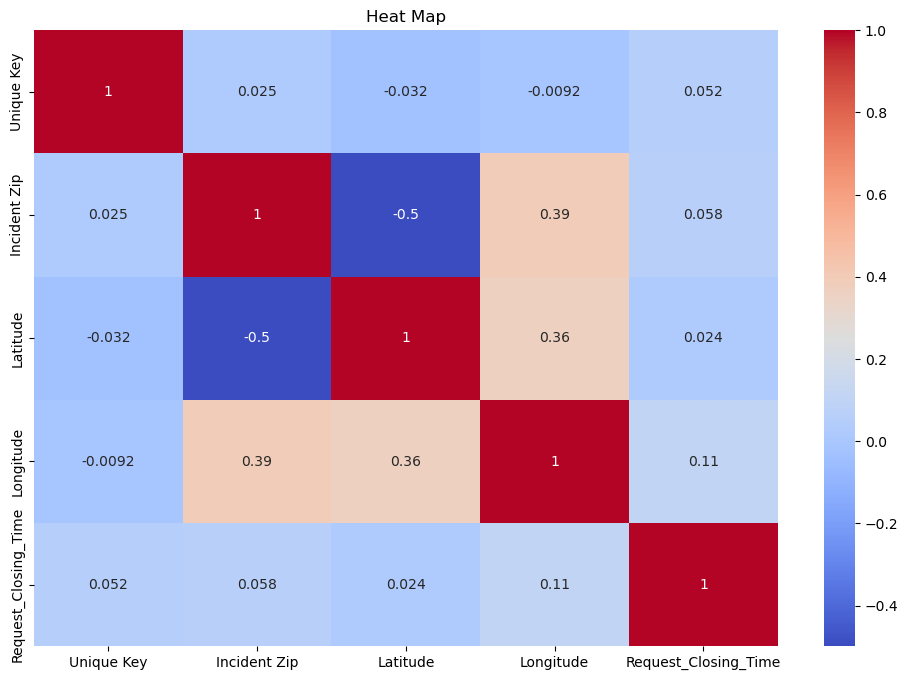

In [14]:
# Calculate correlations
correlation_matrix = df_clean[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

## Program to Calculate and Show Correlation of All Variables

In [15]:
# Calculate correlation matrix
correlation_matrix = df_clean[numerical_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                       Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.024897 -0.032276  -0.009158   
Incident Zip            0.024897      1.000000 -0.498492   0.391360   
Latitude               -0.032276     -0.498492  1.000000   0.364962   
Longitude              -0.009158      0.391360  0.364962   1.000000   
Request_Closing_Time    0.052209      0.058359  0.023820   0.109899   

                      Request_Closing_Time  
Unique Key                        0.052209  
Incident Zip                      0.058359  
Latitude                          0.023820  
Longitude                         0.109899  
Request_Closing_Time              1.000000  


# Data Exploration
### Insight 1: Top 10 Complaint Types (Entire Dataset)

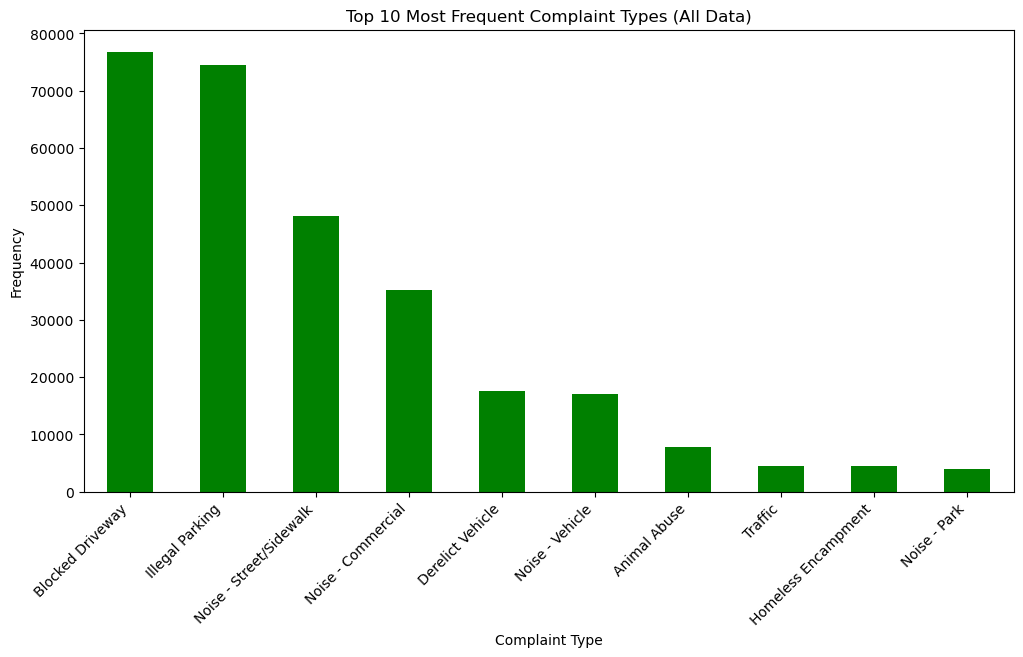

In [17]:
plt.figure(figsize=(12, 6))
df_clean['Complaint Type'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Complaint Types (All Data)')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Insight 2: Response Time Distribution by Borough (Entire Dataset)

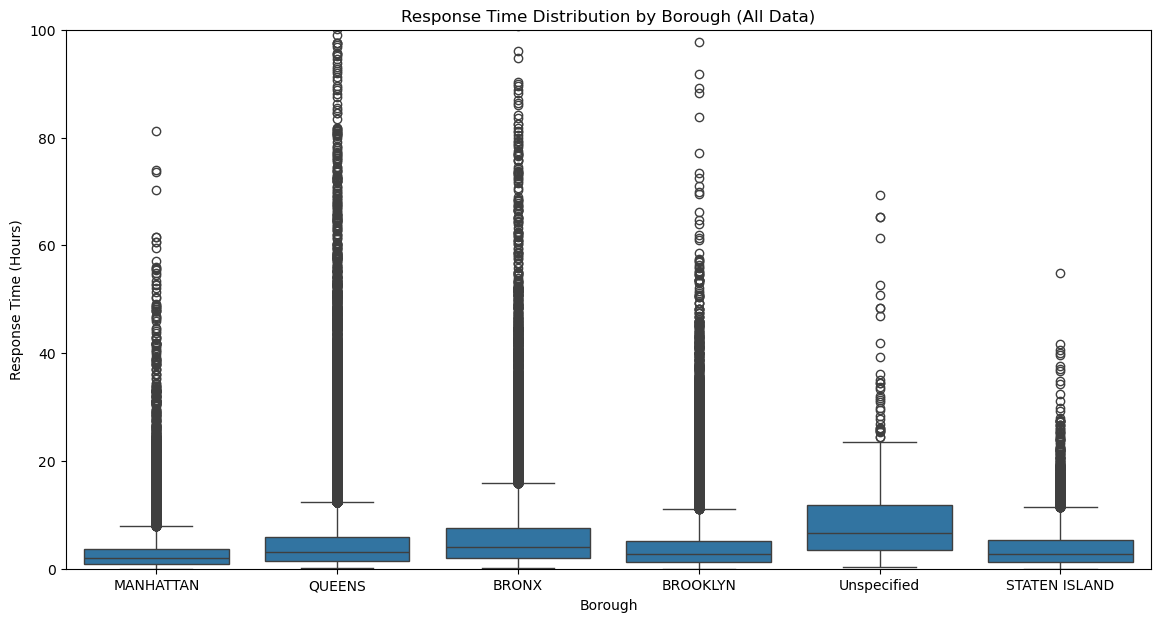

In [18]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Borough', y='Request_Closing_Time', data=df_clean)
plt.title('Response Time Distribution by Borough (All Data)')
plt.ylim(0, 100)
plt.xlabel('Borough')
plt.ylabel('Response Time (Hours)')
plt.show()

### Insight 3: Hourly Request Volume (Entire Dataset)

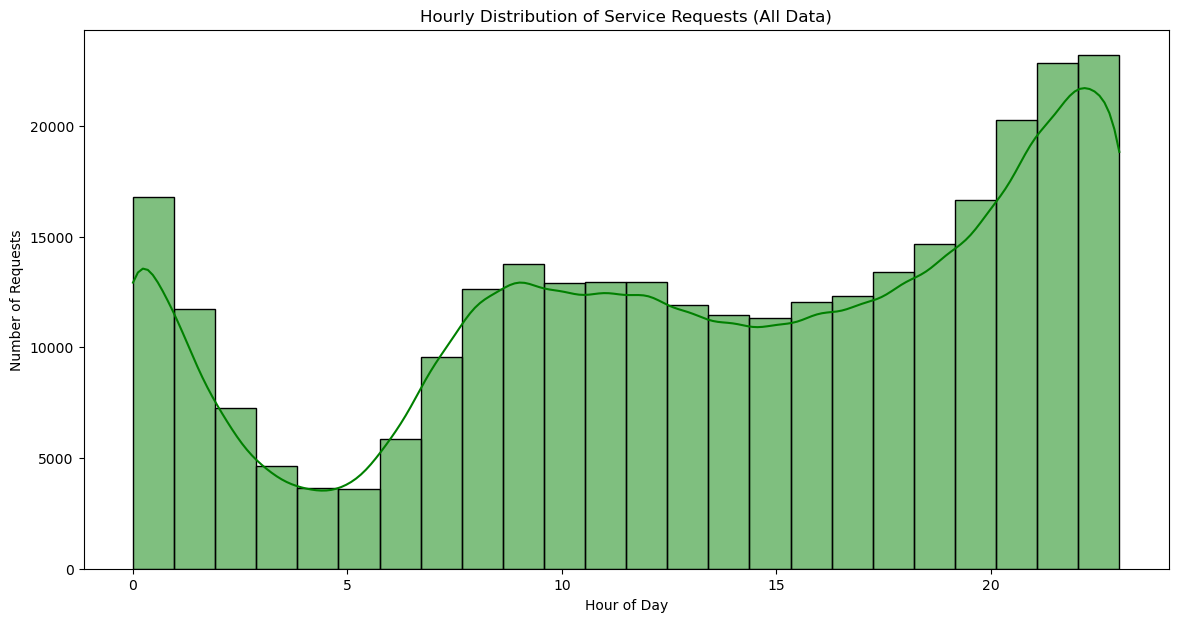

In [19]:
# Extracting hour from 'Created Date' for all rows
df_clean['Created_Hour'] = df_clean['Created Date'].dt.hour

# Plotting 
plt.figure(figsize=(14, 7))
sns.histplot(df_clean['Created_Hour'], bins=24, kde=True, color='green')
plt.title('Hourly Distribution of Service Requests (All Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()

### Insight 4: Complaint Types by Average Closing Time & Borough (Entire Dataset)

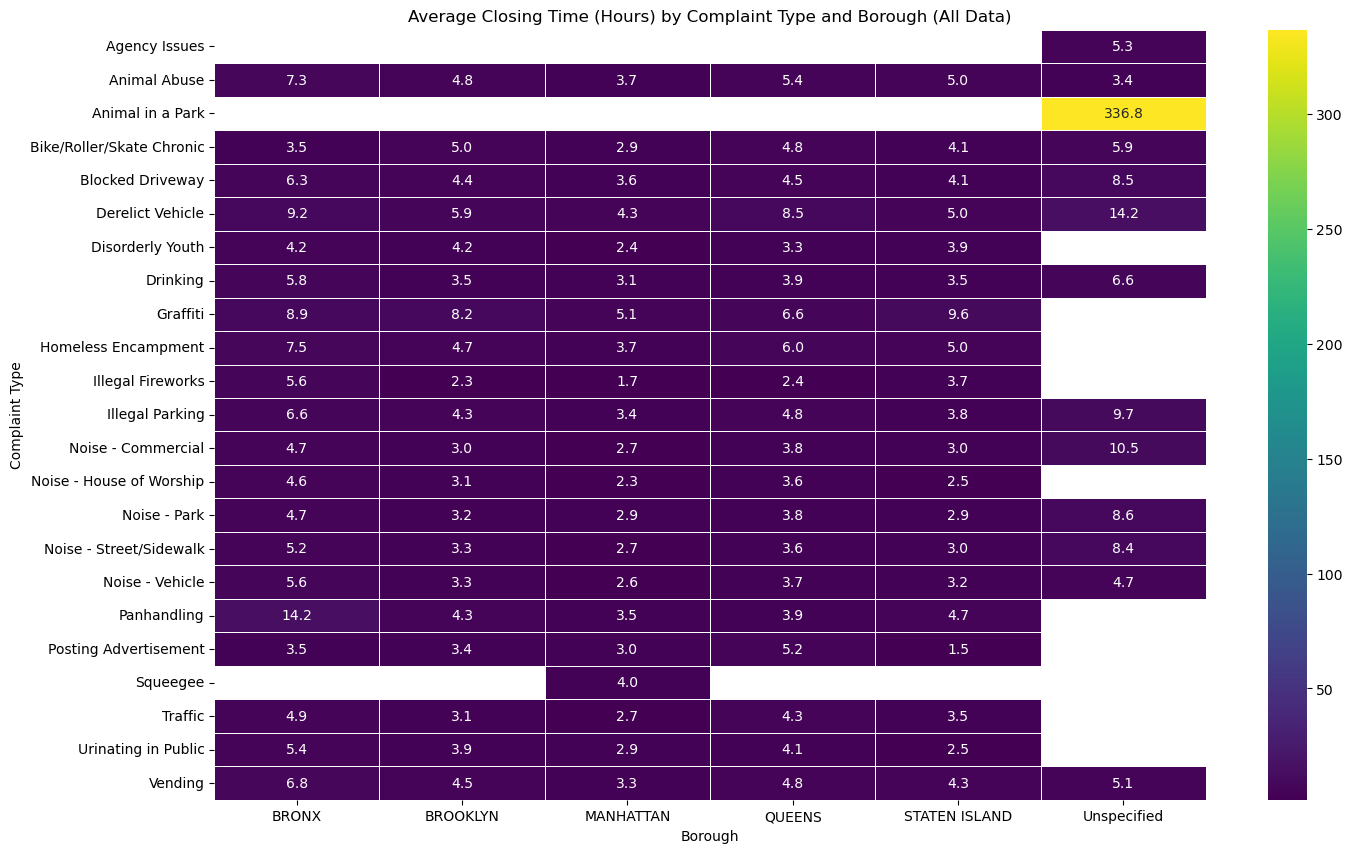

In [20]:
# Groupping by Complaint Type and Borough
avg_closing = df_clean.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().reset_index()

# Pivot for heatmap
pivot_table = avg_closing.pivot_table(index='Complaint Type', columns='Borough', values='Request_Closing_Time')

# Plotting
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Closing Time (Hours) by Complaint Type and Borough (All Data)')
plt.xlabel('Borough')
plt.ylabel('Complaint Type')
plt.show()

## Statistical Testing

### Test 1: Whether the average response time across complaint types is similar or not.
1. State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
2. Perform the statistical test and provide the p-value.
3. Interpret the results to accept or reject the Null Hypothesis.



In [28]:
# Extract all complaint types (no subset)
complaint_types = df_clean['Complaint Type'].unique()

# Prepare groups for ANOVA
groups = [df_clean[df_clean['Complaint Type'] == ct]['Request_Closing_Time'] for ct in complaint_types]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("Reject H₀: Significant difference in response times across complaint types.")
else:
    print("Fail to reject H₀: No significant difference.")

ANOVA p-value: 0.0000
Reject H₀: Significant difference in response times across complaint types.


## Test 2: Whether the type of complaint or service requested and location are related.
1. State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
2. Perform the statistical test and provide the p-value.
3. Interpret the results to accept or reject the Null Hypothesis.

In [25]:
# Create contingency table for all complaints and boroughs
contingency_table = pd.crosstab(df_clean['Complaint Type'], df_clean['Borough'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square p-value: {p:.4f}")

# Interpret results
if p < 0.05:
    print("Reject H₀: Significant association between complaint type and borough.")
else:
    print("Fail to reject H₀: No significant association.")

Chi-Square p-value: 0.0000
Reject H₀: Significant association between complaint type and borough.
